In [1]:
!pip install datasets

In [2]:
!pip install pandas

In [3]:
from datasets import load_dataset
import pandas as pd

In [4]:
rawdataset = load_dataset("tdavidson/hate_speech_offensive")

In [5]:
rawdataset['train']

Dataset({
    features: ['count', 'hate_speech_count', 'offensive_language_count', 'neither_count', 'class', 'tweet'],
    num_rows: 24783
})

**Now to convert the the rawdataset to be pandas compatible**

In [6]:
dataset = rawdataset['train'].to_pandas()

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


**Performing Datacleaning**

In [8]:
dataset = dataset[['tweet', 'class']]

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   class   24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


In [10]:
dataset = dataset.drop_duplicates(subset='tweet')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   24783 non-null  object
 1   class   24783 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


For removing spaces from infront or behind of the tweets

In [12]:
dataset['tweet'] = dataset['tweet'].astype(str).str.strip()

In [13]:
dataset.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


Dropping empty rows

In [14]:
dataset.dropna()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24779,"you've gone and broke the wrong heart baby, an...",2
24780,young buck wanna eat!!.. dat nigguh like I ain...,1
24781,youu got wild bitches tellin you lies,1


In [15]:
dataset.head(30)

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",1
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",1
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,1
8,""" &amp; you might not get ya bitch back &amp; ...",1
9,""" @rhythmixx_ :hobbies include: fighting Maria...",1


**Installing NLTK for extensive text preprocessing and tokenizing and lemetization**

In [16]:
!pip install nltk

In [17]:
import re, html
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avase\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\avase\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\avase\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avase\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\avase\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [19]:
def clean_text(raw_tweet):
    text = html.unescape(str(raw_tweet))
    text = text.lower()
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"@\w*", " ", text)      # remove usernames and @
    text = re.sub(r"http\S+", " ", text)   # to remove URLs
    text = re.sub(r"[^a-z ]", " ", text)

    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)

    clean_tokens = []
    for word, tag in tagged:
        if word not in stop_words and len(word) > 1:
            wn_tag = get_wordnet_pos(tag)
            root = lemmatizer.lemmatize(word, pos=wn_tag)
            clean_tokens.append(root)

    return " ".join(clean_tokens)

In [20]:
dataset['processed_text'] = dataset['tweet'].apply(clean_text)
dataset = dataset[dataset['processed_text'].str.strip() != ""]

In [21]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


**Train Test Split and TF- IDF Vectorization**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_text = dataset['processed_text'] 
y = dataset['class']                  
#Class 0 for Hate Speech
#Class 1 for offensive Language
#Class 2 for neither

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_text)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Using SVM model**

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM accuracy:", acc_svm)
print("SVM report:\n", classification_report(y_test, y_pred_svm))
print("SVM confusion matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM accuracy: 0.9138591890256204
SVM report:
               precision    recall  f1-score   support

           0       0.60      0.16      0.26       286
           1       0.93      0.97      0.95      3838
           2       0.86      0.92      0.89       833

    accuracy                           0.91      4957
   macro avg       0.80      0.68      0.70      4957
weighted avg       0.90      0.91      0.90      4957

SVM confusion matrix:
 [[  47  213   26]
 [  27 3716   95]
 [   4   62  767]]


**Training Using Random Forest**

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
print("RF accuracy:", acc_rf)
print("RF report:\n", classification_report(y_test, y_pred_rf))
print("RF confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))

RF accuracy: 0.9053863223724027
RF report:
               precision    recall  f1-score   support

           0       0.63      0.17      0.27       286
           1       0.93      0.96      0.94      3838
           2       0.83      0.90      0.86       833

    accuracy                           0.91      4957
   macro avg       0.80      0.68      0.69      4957
weighted avg       0.89      0.91      0.89      4957

RF confusion matrix:
 [[  50  208   28]
 [  25 3691  122]
 [   4   82  747]]


**HyperTuning Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_base = RandomForestClassifier(
    random_state=42,
    n_jobs=-1   #in order to use all the cores of my CPU
)

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [26]:
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,          
    n_jobs=-1,     # for using all CPU cores
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\avase\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
Best CV accuracy: 0.9038539144471347


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_rf = grid_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Tuned RF test accuracy:", acc_best_rf)
print("Tuned RF report:\n", classification_report(y_test, y_pred_best_rf))
print("Tuned RF confusion matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

Tuned RF test accuracy: 0.9047811176114585
Tuned RF report:
               precision    recall  f1-score   support

           0       0.63      0.16      0.26       286
           1       0.93      0.96      0.94      3838
           2       0.83      0.89      0.86       833

    accuracy                           0.90      4957
   macro avg       0.80      0.67      0.69      4957
weighted avg       0.89      0.90      0.89      4957

Tuned RF confusion matrix:
 [[  47  211   28]
 [  24 3695  119]
 [   4   86  743]]


**Sample Predictions made by SVM and Random Forest**

In [28]:
import numpy as np

label_map = {
    0: "Hate Speech",
    1: "Offensive Language",
    2: "Neither"
}

def predict_with_svm(text):
    # For Cleaning the Raw text
    cleaned = clean_text(text)
    # For Vectorization
    X_vec = vectorizer.transform([cleaned])
    # Predicting Labels
    pred_label = svm_model.predict(X_vec)[0]
    # Label it to human readable code
    return pred_label, label_map[int(pred_label)]

def predict_with_rf(text):
    cleaned = clean_text(text)
    X_vec = vectorizer.transform([cleaned])
    pred_label = best_rf.predict(X_vec)[0]
    return pred_label, label_map[int(pred_label)]

In [106]:
test_text = "That movie was bad."

svm_code, svm_label = predict_with_svm(test_text)
rf_code, rf_label  = predict_with_rf(test_text)

print("Input text:", test_text)
print("SVM prediction:", svm_code, "->", svm_label)
print("RF prediction:", rf_code, "->", rf_label)

Input text: That movie was bad.
SVM prediction: 2 -> Neither
RF prediction: 2 -> Neither


**Graphs and Plots**

In [34]:
!pip install matplotlib
!pip install seaborn

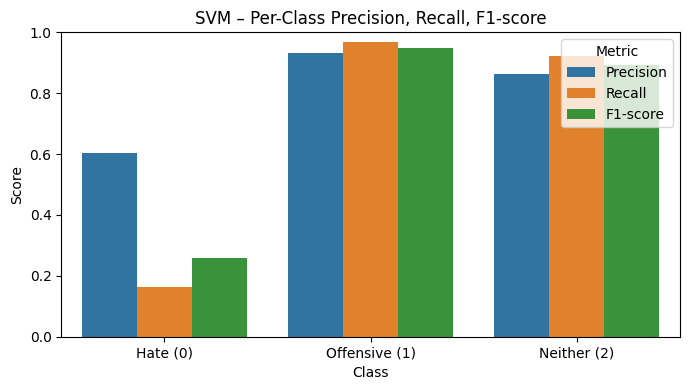

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Get SVM classification report as dict
svm_rep = classification_report(y_test, y_pred_svm, output_dict=True)

# Build per-class DataFrame
svm_df = pd.DataFrame({
    'Class': ['Hate (0)', 'Offensive (1)', 'Neither (2)'],
    'Precision': [
        svm_rep['0']['precision'],
        svm_rep['1']['precision'],
        svm_rep['2']['precision']
    ],
    'Recall': [
        svm_rep['0']['recall'],
        svm_rep['1']['recall'],
        svm_rep['2']['recall']
    ],
    'F1-score': [
        svm_rep['0']['f1-score'],
        svm_rep['1']['f1-score'],
        svm_rep['2']['f1-score']
    ]
})

# Melt to long format for seaborn
svm_df_melt = svm_df.melt(id_vars='Class', var_name='Metric', value_name='Score')

plt.figure(figsize=(7, 4))
sns.barplot(data=svm_df_melt, x='Class', y='Score', hue='Metric')
plt.ylim(0, 1)
plt.title('SVM – Per-Class Precision, Recall, F1-score')
plt.ylabel('Score')
plt.xlabel('Class')
plt.legend(title='Metric', loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 700x600 with 0 Axes>

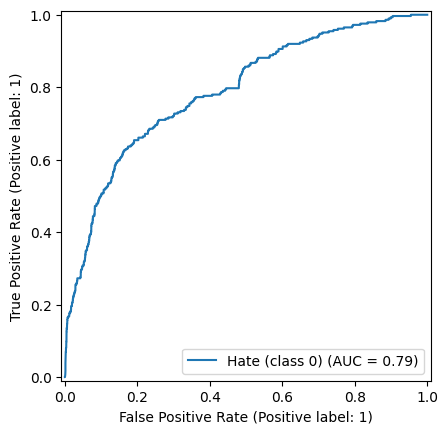

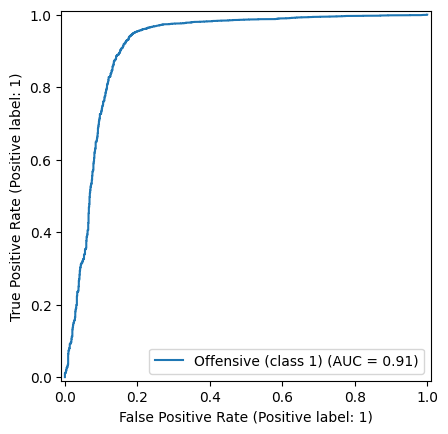

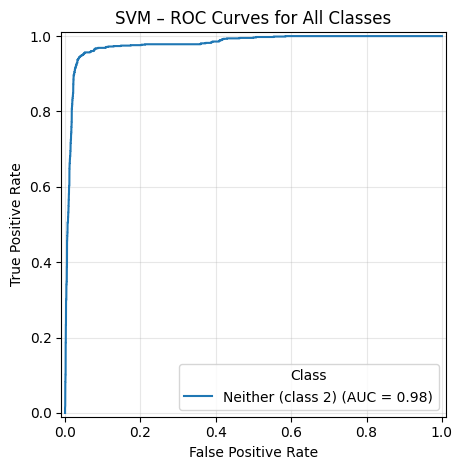

In [71]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

classes = [0, 1, 2]  # 0=hate,1=offensive,2=neither
class_names = {0: "Hate", 1: "Offensive", 2: "Neither"}

y_test_bin = label_binarize(y_test, classes=classes)

# Scores for SVM
y_score_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_score_svm[:, i],
        name=f"{class_names[cls]} (class {cls})"
    )

plt.title("SVM – ROC Curves for All Classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", title="Class")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

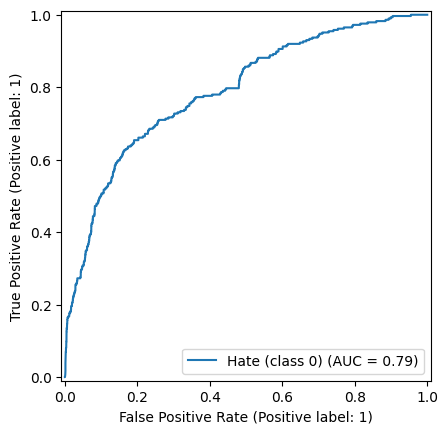

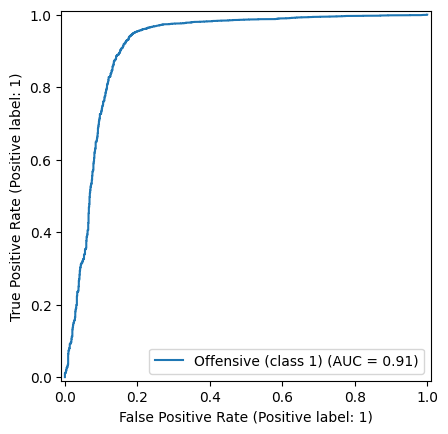

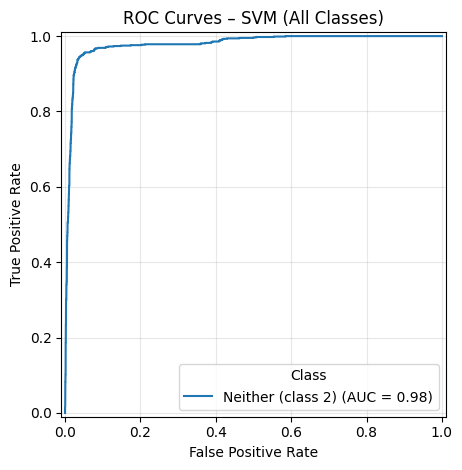

In [66]:
classes = [0, 1, 2]
class_names = {0: "Hate", 1: "Offensive", 2: "Neither"}

y_test_bin = label_binarize(y_test, classes=classes)
y_score_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_score_svm[:, i],
        name=f"{class_names[cls]} (class {cls})"
    )
plt.title("ROC Curves – SVM (All Classes)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", title="Class")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Random Forest Classifier

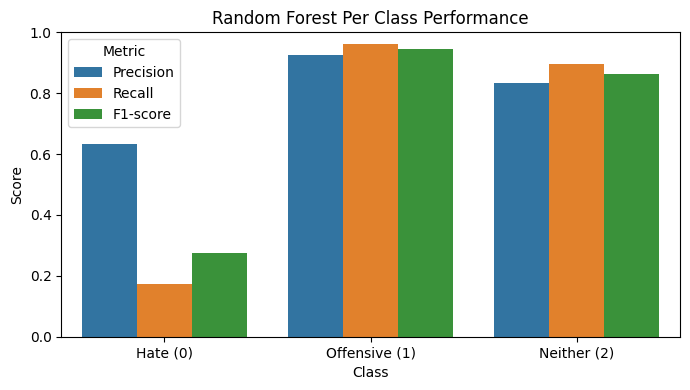

In [48]:
rf_rep = classification_report(y_test, y_pred_rf, output_dict=True)

rf_df = pd.DataFrame({
    'Class': ['Hate (0)', 'Offensive (1)', 'Neither (2)'],
    'Precision': [
        rf_rep['0']['precision'],
        rf_rep['1']['precision'],
        rf_rep['2']['precision']
    ],
    'Recall': [
        rf_rep['0']['recall'],
        rf_rep['1']['recall'],
        rf_rep['2']['recall']
    ],
    'F1-score': [
        rf_rep['0']['f1-score'],
        rf_rep['1']['f1-score'],
        rf_rep['2']['f1-score']
    ]
})

rf_df_melt = rf_df.melt(id_vars='Class', var_name='Metric', value_name='Score')

plt.figure(figsize=(7, 4))
sns.barplot(data=rf_df_melt, x='Class', y='Score', hue='Metric')
plt.ylim(0, 1)
plt.title('Random Forest Per Class Performance')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

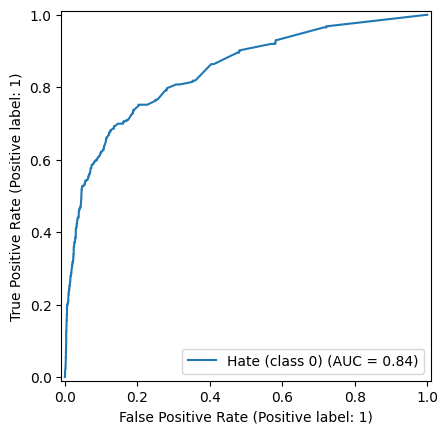

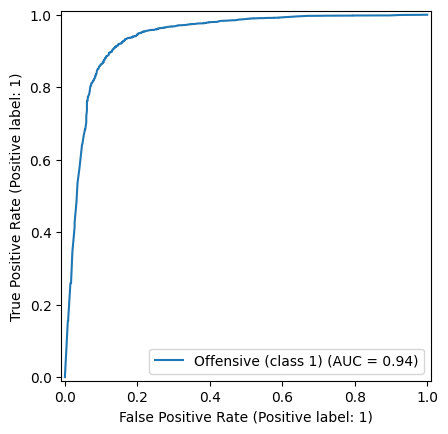

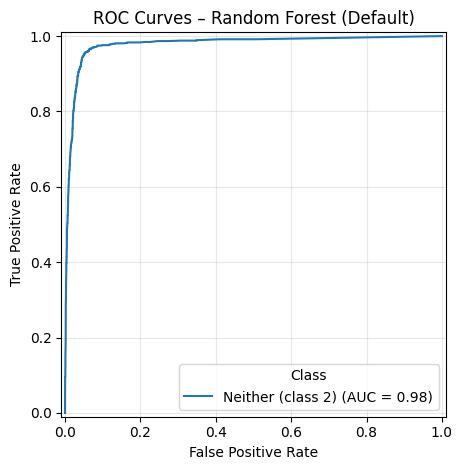

In [58]:
y_score_rf = rf_model.predict_proba(X_test)

plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_score_rf[:, i],
        name=f"{class_names[cls]} (class {cls})"
    )
plt.title("ROC Curves – Random Forest (Default)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", title="Class")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Random Forest Tuned

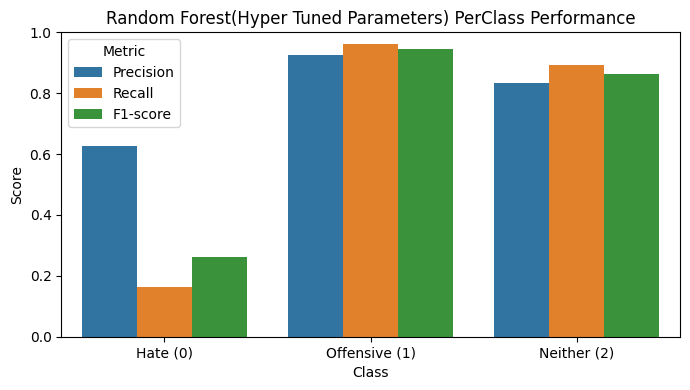

In [51]:
rf_tuned_rep = classification_report(y_test, y_pred_best_rf, output_dict=True)

rf_tuned_df = pd.DataFrame({
    'Class': ['Hate (0)', 'Offensive (1)', 'Neither (2)'],
    'Precision': [
        rf_tuned_rep['0']['precision'],
        rf_tuned_rep['1']['precision'],
        rf_tuned_rep['2']['precision']
    ],
    'Recall': [
        rf_tuned_rep['0']['recall'],
        rf_tuned_rep['1']['recall'],
        rf_tuned_rep['2']['recall']
    ],
    'F1-score': [
        rf_tuned_rep['0']['f1-score'],
        rf_tuned_rep['1']['f1-score'],
        rf_tuned_rep['2']['f1-score']
    ]
})

rf_tuned_df_melt = rf_tuned_df.melt(id_vars='Class', var_name='Metric', value_name='Score')

plt.figure(figsize=(7, 4))
sns.barplot(data=rf_tuned_df_melt, x='Class', y='Score', hue='Metric')
plt.ylim(0, 1)
plt.title('Random Forest(Hyper Tuned Parameters) PerClass Performance')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


<Figure size 700x600 with 0 Axes>

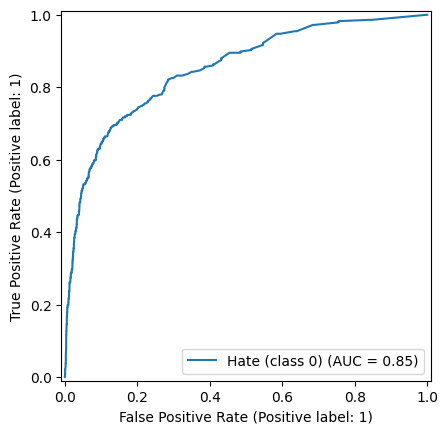

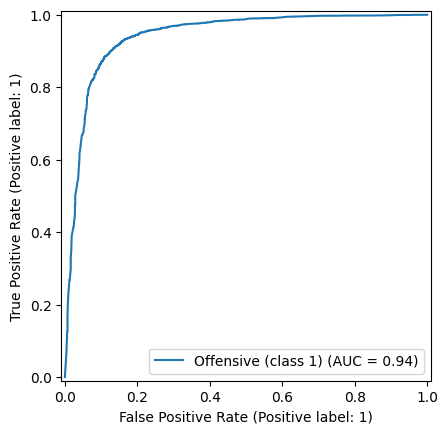

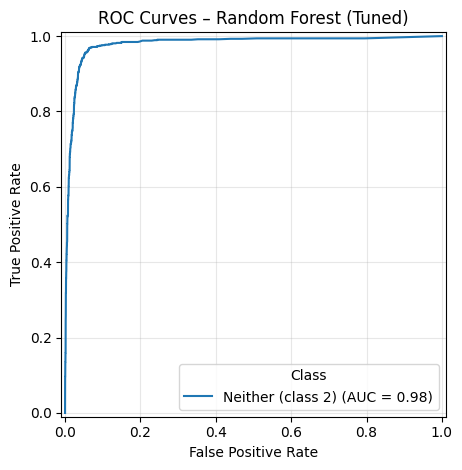

In [59]:
y_score_rf_tuned = best_rf.predict_proba(X_test)

plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_score_rf_tuned[:, i],
        name=f"{class_names[cls]} (class {cls})"
    )
plt.title("ROC Curves – Random Forest (Tuned)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", title="Class")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Overall Accuracy Barchart

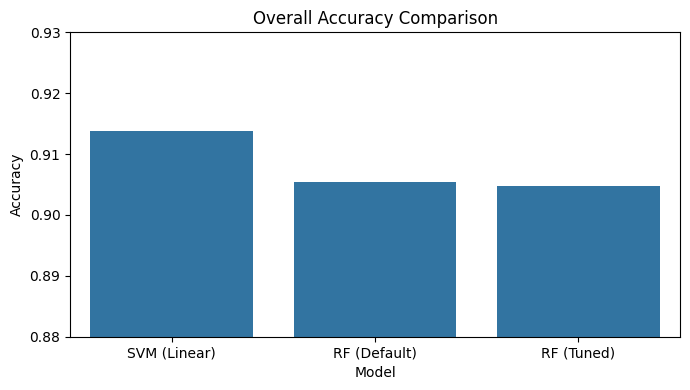

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 4))
sns.barplot(data=summary_df, x='Model', y='Accuracy')
plt.ylim(0.88, 0.93)
plt.title('Overall Accuracy Comparison')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

Precision–Recall curves

<Figure size 700x600 with 0 Axes>

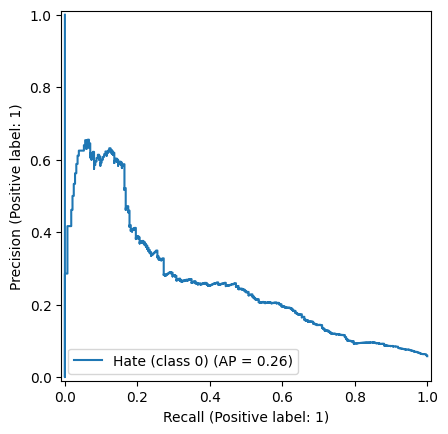

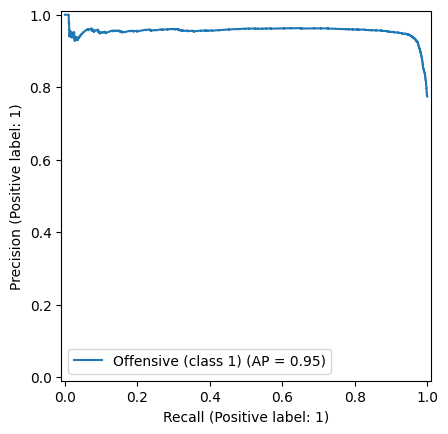

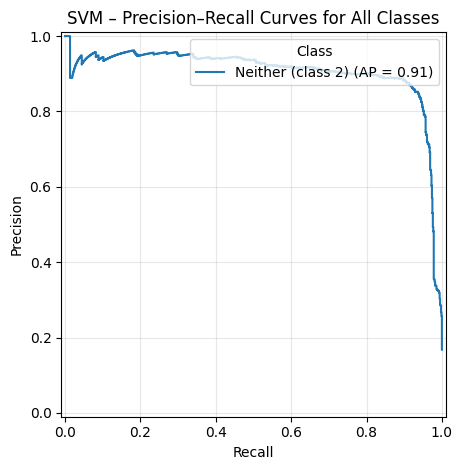

In [67]:
# Scores for SVM
y_score_svm = svm_model.decision_function(X_test)

plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    PrecisionRecallDisplay.from_predictions(
        y_test_bin[:, i],
        y_score_svm[:, i],
        name=f"{class_names[cls]} (class {cls})"
    )

plt.title("SVM – Precision–Recall Curves for All Classes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right", title="Class")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

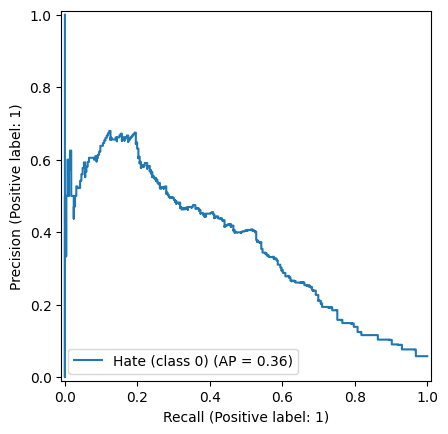

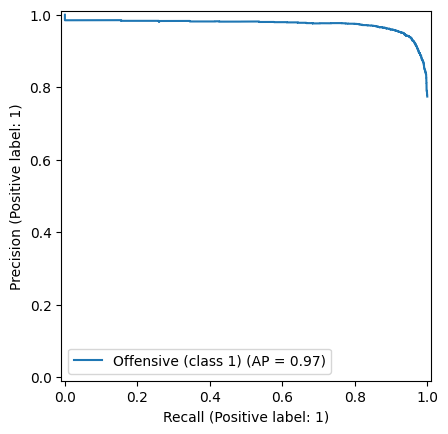

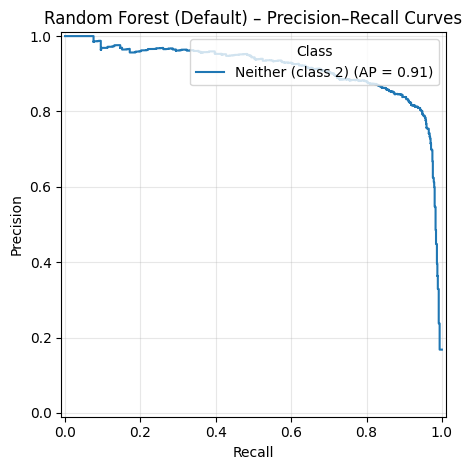

In [69]:
# Scores for default RF
y_score_rf = rf_model.predict_proba(X_test)

plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    PrecisionRecallDisplay.from_predictions(
        y_test_bin[:, i],
        y_score_rf[:, i],
        name=f"{class_names[cls]} (class {cls})"
    )

plt.title("Random Forest (Default) – Precision–Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right", title="Class")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

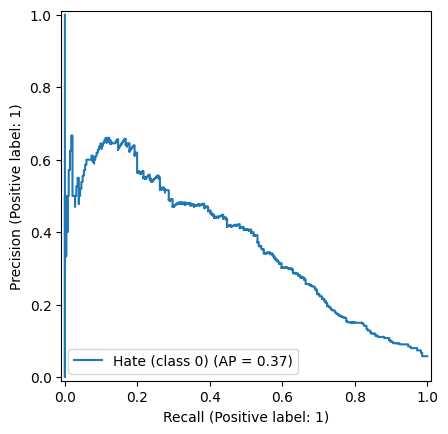

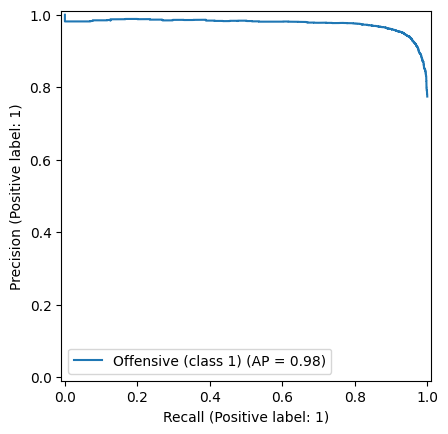

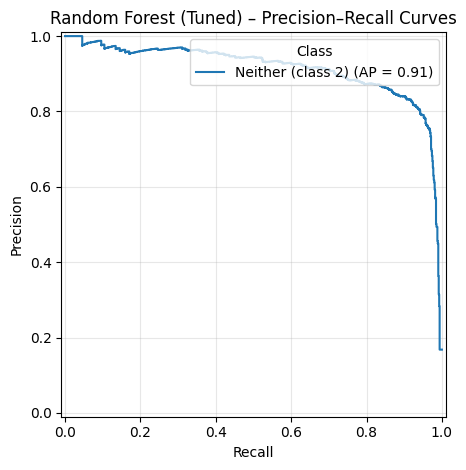

In [70]:
# Scores for tuned RF
y_score_rf_tuned = best_rf.predict_proba(X_test)

plt.figure(figsize=(7, 6))
for i, cls in enumerate(classes):
    PrecisionRecallDisplay.from_predictions(
        y_test_bin[:, i],
        y_score_rf_tuned[:, i],
        name=f"{class_names[cls]} (class {cls})"
    )

plt.title("Random Forest (Tuned) – Precision–Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper right", title="Class")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()